DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
Perform dimensionality reduction.
Predict your test_df values using XGBoost.

In [1]:
#importing basic lybraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [6]:
df_train.shape

(4209, 378)

In [7]:
df_test.shape

(4209, 377)

### checking for null values 

In [8]:
df_train.isnull().any().sum()

0

In [9]:
df_test.isnull().any().sum()

0

In [10]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Droping columns with zero variance

In [11]:
zero_var = df_train.var() == 0

In [12]:
zero_var

ID      False
y       False
X10     False
X11      True
X12     False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 370, dtype: bool

In [13]:
zero_var[zero_var!=0]

X11     True
X93     True
X107    True
X233    True
X235    True
X268    True
X289    True
X290    True
X293    True
X297    True
X330    True
X347    True
dtype: bool

In [14]:
df_train_no_var = df_train.drop(["X11","X93","X107", "X233", "X235", "X268", "X289","X289","X290","X293","X297","X330","X347"], axis=1)
df_test_no_var = df_test.drop(["X11","X93","X107", "X233", "X235", "X268", "X289","X289","X290","X293","X297","X330","X347"], axis=1)

In [15]:
df_train_no_var.shape

(4209, 366)

In [16]:
df_test_no_var.shape

(4209, 365)

### Checking for unique values

In [17]:
df_train_no_var.X0.unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [18]:
df_train_no_var.X1.unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [19]:
df_train_no_var.X2.unique()

array(['at', 'av', 'n', 'e', 'as', 'aq', 'r', 'ai', 'ak', 'm', 'a', 'k',
       'ae', 's', 'f', 'd', 'ag', 'ay', 'ac', 'ap', 'g', 'i', 'aw', 'y',
       'b', 'ao', 'al', 'h', 'x', 'au', 't', 'an', 'z', 'ah', 'p', 'am',
       'j', 'q', 'af', 'l', 'aa', 'c', 'o', 'ar'], dtype=object)

In [20]:
df_train_no_var.X8.unique()

array(['o', 'x', 'e', 'n', 's', 'a', 'h', 'p', 'm', 'k', 'd', 'i', 'v',
       'j', 'b', 'q', 'w', 'g', 'y', 'l', 'f', 'u', 'r', 't', 'c'],
      dtype=object)

### Applying label Encoder 

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
cat_features_train = df_train_no_var.loc[:,"X0":"X8"]
cat_features_test = df_test_no_var.loc[:,"X0":"X8"]

In [24]:
cat_trans_train = cat_features_train.apply(le.fit_transform)
cat_trans_test = cat_features_test.apply(le.fit_transform)

In [25]:
cat_trans_train.head(3)

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23


In [26]:
cat_trans_test.head(3)

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9


In [27]:
df_train = df_train_no_var.drop(["X0","X1","X2","X3","X4","X5","X6","X8"], axis=1)
df_test = df_test_no_var.drop(["X0","X1","X2","X3","X4","X5","X6","X8"], axis=1)

In [28]:
df_train_concat = pd.concat([df_train, cat_trans_train],axis = 1 )
df_test_concat = pd.concat([df_test, cat_trans_test],axis = 1 )

In [29]:
df_train_concat.head(3)

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,130.81,0,0,1,0,0,0,0,1,...,0,0,32,23,17,0,3,24,9,14
1,6,88.53,0,0,0,0,0,0,0,1,...,0,0,32,21,19,4,3,28,11,14
2,7,76.26,0,0,0,0,0,0,1,0,...,0,0,20,24,34,2,3,27,9,23


In [30]:
df_test_concat.head(3)

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,1,0,0,0,0,0,0,0,0,0,...,0,0,21,23,34,5,3,26,0,22
1,2,0,0,0,0,0,0,0,0,1,...,0,0,42,3,8,0,3,9,6,24
2,3,0,0,0,1,0,0,0,0,0,...,0,0,21,23,17,5,3,0,9,9


In [31]:
X_train = df_train_concat.drop(["y", "ID"], axis=1)

X_test = df_test_concat.drop("ID", axis=1)
Y = df_train_concat["y"]

In [32]:
X_train.head(3)

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,1,0,0,0,0,1,0,0,...,0,0,32,23,17,0,3,24,9,14
1,0,0,0,0,0,0,0,1,0,0,...,0,0,32,21,19,4,3,28,11,14
2,0,0,0,0,0,0,1,0,0,0,...,0,0,20,24,34,2,3,27,9,23


In [33]:
Y.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

### Performing Dimentionality reduction

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=X_train.shape[1])

In [36]:
pca.fit(X_train)

PCA(n_components=364)

<AxesSubplot:>

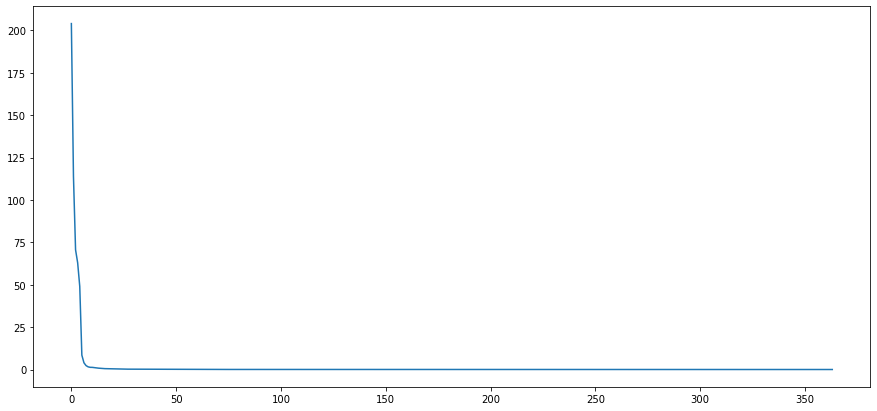

In [37]:
plt.figure(figsize= (15,7))
sns.lineplot(data=pca.explained_variance_)

In [38]:
pca = PCA(n_components=8)

In [39]:
pca.fit(X_train)

PCA(n_components=8)

<AxesSubplot:>

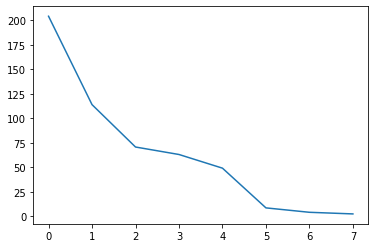

In [40]:
sns.lineplot(data=pca.explained_variance_)

In [41]:
pca.explained_variance_ratio_

array([0.38334782, 0.21388033, 0.13261866, 0.11826642, 0.09206008,
       0.01590604, 0.0074454 , 0.00433701])

In [42]:
X_train_transformed = pca.transform(X_train)

In [43]:
X_train_transformed.shape

(4209, 8)

In [44]:
X_test_transformed = pca.transform(X_test)
X_test_transformed.shape

(4209, 8)

In [45]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [46]:
data_matrix = xgb.DMatrix(data=X_train_transformed,label= Y)

In [47]:
X_train, X_test,y_train,y_test = train_test_split(X_train_transformed, Y, test_size=0.2, random_state=1234)

In [48]:
X_train.shape

(3367, 8)

In [49]:
y_train.shape

(3367,)

In [50]:
X_test.shape

(842, 8)

In [51]:
X_test.shape

(842, 8)

In [52]:
xgb_r = xgb.XGBRegressor(objective= 'reg:linear', max_depth=4, learning_rate = 0.1, n_estimators=100, random_state=10)

In [53]:
xgb_r.fit(X_train, y_train)

[00:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [54]:
y_pred = xgb_r.predict(X_train)

In [55]:
r2_score(y_pred, y_train)

-0.126277436846284

In [56]:
mean_squared_error(y_pred, y_train, squared= False)

8.21972094248935

In [57]:
test_pred = xgb_r.predict(X_test)

In [58]:
r2_score(test_pred, y_test)

-1.0195230414485907

In [59]:
mean_squared_error(test_pred, y_test, squared=False)

10.917007769346105

### Lets Predict test values

In [60]:
df_pred = xgb_r.predict(X_test_transformed)

In [61]:
ID = df_test["ID"]

In [62]:
result = pd.DataFrame({'ID':ID, 'Result': df_pred})

In [63]:
result

,ID,Result
0,1,78.804230
1,2,96.564468
2,3,91.826828
3,4,78.341728
4,5,113.829849
...,...,...
4204,8410,104.823280
4205,8411,95.321526
4206,8413,101.053963
4207,8414,112.235291


In [65]:
result.to_csv('result.csv', index=False)